# Binary classification (diabetes)

In [2]:
# Original and full example:
# https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Binary%20Classification.ipynb

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [4]:
from pycaret.datasets import get_data
index = get_data('index')

Dataset    Data Types  \
0                            anomaly  Multivariate   
1                             france  Multivariate   
2                            germany  Multivariate   
3                               bank  Multivariate   
4                              blood  Multivariate   
5                             cancer  Multivariate   
6                             credit  Multivariate   
7                           diabetes  Multivariate   
8                    electrical_grid  Multivariate   
9                           employee  Multivariate   
10                             heart  Multivariate   
11                     heart_disease  Multivariate   
12                         hepatitis  Multivariate   
13                            income  Multivariate   
14                             juice  Multivariate   
15                               nba  Multivariate   
16                              wine  Multivariate   
17                         telescope  Multivariate   
18                           titanic  Multivariate   
19  us_presidential_election_results  Multivariate   
20                             glass  Multivariate   
21                              iris  Multivariate   
22                             poker  Multivariate   
23                         questions  Multivariate   
24                         satellite  Multivariate   
25                               CTG  Multivariate   
26                          asia_gdp  Multivariate   
27                         elections  Multivariate   
28                          facebook  Multivariate   
29                               ipl  Multivariate   
30                         jewellery  Multivariate   
31                              mice  Multivariate   
32                         migration  Multivariate   
33                           perfume  Multivariate   
34                           pokemon  Multivariate   
35                        population  Multivariate   
36                     public_health  Multivariate   
37                             seeds  Multivariate   
38                         wholesale  Multivariate   
39                            tweets          Text   
40                            amazon          Text   
41                              kiva          Text   
42                               spx          Text   
43                         wikipedia          Text   
44                        automobile  Multivariate   
45                              bike  Multivariate   
46                            boston  Multivariate   
47                          concrete  Multivariate   
48                           diamond  Multivariate   
49                            energy  Multivariate   
50                            forest  Multivariate   
51                              gold  Multivariate   
52                             house  Multivariate   
53                         insurance  Multivariate   
54                        parkinsons  Multivariate   
55                           traffic  Multivariate   

                   Default Task Target Variable 1 Target Variable 2  \
0             Anomaly Detection               NaN               NaN   
1       Association Rule Mining         InvoiceNo       Description   
2       Association Rule Mining         InvoiceNo       Description   
3       Classification (Binary)           deposit               NaN   
4       Classification (Binary)             Class               NaN   
5       Classification (Binary)             Class               NaN   
6       Classification (Binary)           default               NaN   
7       Classification (Binary)    Class variable               NaN   
8       Classification (Binary)             stabf               NaN   
9       Classification (Binary)              left               NaN   
10      Classification (Binary)             DEATH               NaN   
11      Classification (Binary)           Disease               NaN   
12      Classification (Bin

In [5]:
data = get_data('diabetes')

Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   
4                                40                                35   

   2-Hour serum insulin (mu U/ml)  \
0                               0   
1                               0   
2                               0   
3                              94   
4                             168   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                            33.6                       0.627   
1                                            26.6                       0.351   
2                                            23.3                       0.672   
3                                            28.1                       0.167   
4                                            43.1                       2.288   

   Age (years)  Class variable  
0           50               1  
1           31               0  
2           32               1  
3           21               0  
4           33               1

In [6]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

In [7]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [8]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [9]:
# init setup on exp
exp.setup(data, target = 'Class variable', session_id = 123)

In [10]:
# compare baseline models
best = compare_models()

In [11]:
# compare models using OOP
exp.compare_models()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Analyzing model

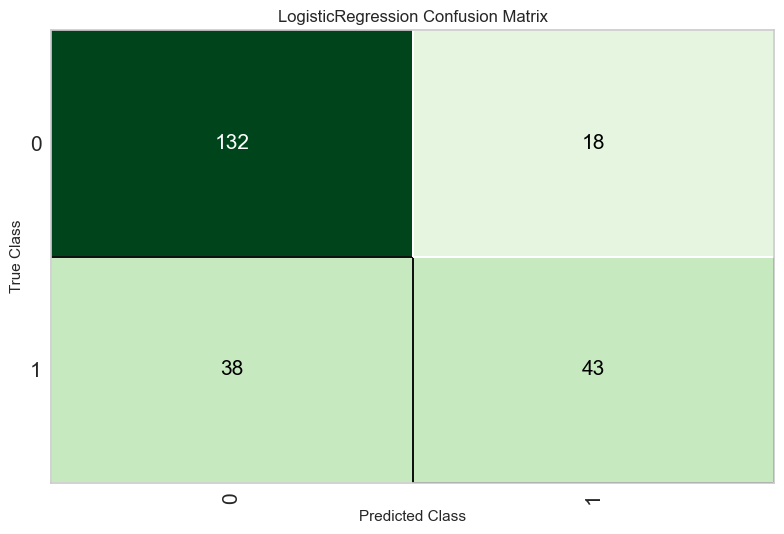

In [12]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

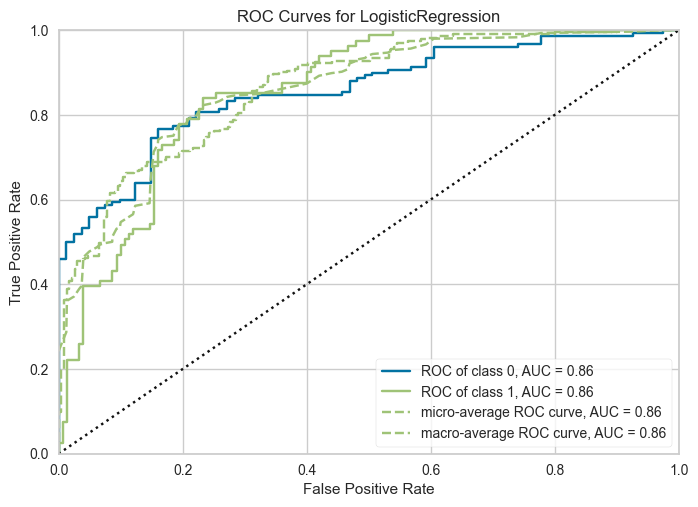

In [13]:
# plot AUC
plot_model(best, plot = 'auc')

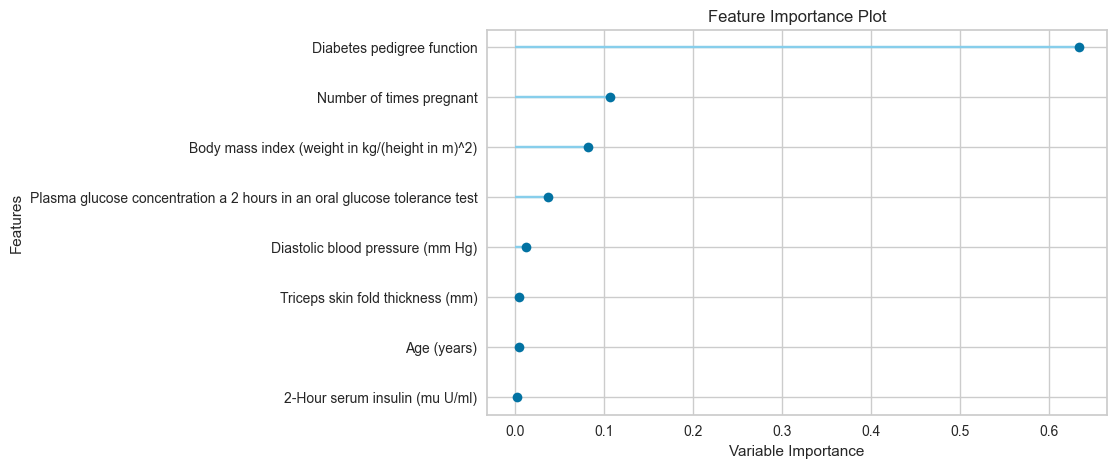

In [14]:
# plot feature importance
plot_model(best, plot = 'feature')

In [15]:
# check docstring to see available plots 
# help(plot_model)

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [17]:
# predict on test set
holdout_pred = predict_model(best)

In [18]:
# show predictions df
holdout_pred.head()


Number of times pregnant  \
552                         6   
438                         1   
149                         2   
373                         2   
36                         11   

     Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
552                                                114                          
438                                                 97                          
149                                                 90                          
373                                                105                          
36                                                 138                          

     Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
552                                88                                 0   
438                                70                                15   
149                                70                                17   
373                                58                                40   
36                                 76                                 0   

     2-Hour serum insulin (mu U/ml)  \
552                               0   
438                               0   
149                               0   
373                              94   
36                                0   

     Body mass index (weight in kg/(height in m)^2)  \
552                                       27.799999   
438                                       18.200001   
149                                       27.299999   
373                                       34.900002   
36                                        33.200001   

     Diabetes pedigree function  Age (years)  Class variable  \
552                       0.247           66               0   
438                       0.147           21               0   
149                       0.085           22               0   
373                       0.225           25               0   
36                        0.420           35               0   

     prediction_label  prediction_score  
552                 0            0.8037  
438                 0            0.9648  
149                 0            0.9394  
373                 0            0.7999  
36                  1            0.6393

In [19]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('Class variable', axis=1, inplace=True)
new_data.head()

Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   
4                                40                                35   

   2-Hour serum insulin (mu U/ml)  \
0                               0   
1                               0   
2                               0   
3                              94   
4                             168   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                            33.6                       0.627   
1                                            26.6                       0.351   
2                                            23.3                       0.672   
3                                            28.1                       0.167   
4                                            43.1                       2.288   

   Age (years)  
0           50  
1           31  
2           32  
3           21  
4           33

In [20]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

Number of times pregnant  \
0                         6   
1                         1   
2                         8   
3                         1   
4                         0   

   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  \
0                                                148                          
1                                                 85                          
2                                                183                          
3                                                 89                          
4                                                137                          

   Diastolic blood pressure (mm Hg)  Triceps skin fold thickness (mm)  \
0                                72                                35   
1                                66                                29   
2                                64                                 0   
3                                66                                23   
4                                40                                35   

   2-Hour serum insulin (mu U/ml)  \
0                               0   
1                               0   
2                               0   
3                              94   
4                             168   

   Body mass index (weight in kg/(height in m)^2)  Diabetes pedigree function  \
0                                       33.599998                       0.627   
1                                       26.600000                       0.351   
2                                       23.299999                       0.672   
3                                       28.100000                       0.167   
4                                       43.099998                       2.288   

   Age (years)  prediction_label  prediction_score  
0           50                 1            0.6940  
1           31                 0            0.9419  
2           32                 1            0.7976  
3           21                 0            0.9454  
4           33                 1            0.8394

### save model

In [21]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [22]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/_9/ymtwsvk92j5_6_w111rsgs980000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)